In [146]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

import numpy as np
import pandas as pd
import pylab as pl
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.mlab as mlab

In [158]:
df = pd.read_csv('car.csv',header=0)
df.head()

,buying,maint,doors,persons,lug_boot,safety,classe
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [159]:
##   Categorical Conversion

doors = {
            '2':'2',
            '3':'3',
            '4':'4',
            '5more':'5'
          }
persons = {
            '2':'2',
            '4':'4',
            'more':'5'
            }

classe = {
            'unacc':'0',
            'acc':'1',
            'good':'2',
            'vgood':'3'
        }

door_tmp = df['doors']
persons_tmp = df['persons']


X = df[['buying', 'maint', 'lug_boot', 'safety','classe']].values

ordinal_le = LabelEncoder()
X[:,0] = ordinal_le.fit_transform(X[:,0])
X[:,1] = ordinal_le.fit_transform(X[:,1])
X[:,2] = ordinal_le.fit_transform(X[:,2])
X[:,3] = ordinal_le.fit_transform(X[:,3])
X[:,4] = ordinal_le.fit_transform(X[:,4])

door_tmp = pd.get_dummies(door_tmp)
persons_tmp = pd.get_dummies(persons_tmp)


In [160]:
df = pd.DataFrame(X)
df.columns = ['buying', 'maint', 'lug_boot', 'safety', 'classe']
df[['doors_2','doors_3','doors_4','doors_5more']] = door_tmp
df[['persons_2','persons_4','persons_more']] = persons_tmp

# # Moving classe column to the end
classe_tmp = df['classe']
del df['classe']
df['classe'] = classe_tmp

df.head()

,buying,maint,lug_boot,safety,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,classe
0,3,3,2,1,1,0,0,0,1,0,0,2
1,3,3,2,2,1,0,0,0,1,0,0,2
2,3,3,2,0,1,0,0,0,1,0,0,2
3,3,3,1,1,1,0,0,0,1,0,0,2
4,3,3,1,2,1,0,0,0,1,0,0,2


In [161]:
print(df.describe())
print(df.classe.unique())

           doors_2      doors_3      doors_4  doors_5more    persons_2  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      0.250000     0.250000     0.250000     0.250000     0.333333   
std       0.433138     0.433138     0.433138     0.433138     0.471541   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.250000     0.250000     0.250000     0.250000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         persons_4  persons_more  
count  1728.000000   1728.000000  
mean      0.333333      0.333333  
std       0.471541      0.471541  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       1.000000      1.000000  
max       1.000000      1.000000  
[2 0 3 1]


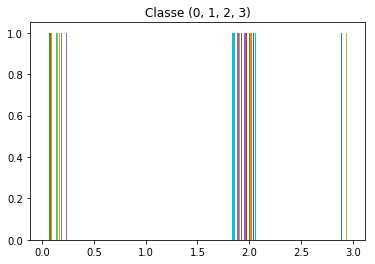

In [162]:
a=df['classe']
plt.hist(a)
plt.title('Classe (0, 1, 2, 3)')
plt.show()

In [163]:
df.isnull().sum()

buying          0
maint           0
lug_boot        0
safety          0
doors_2         0
doors_3         0
doors_4         0
doors_5more     0
persons_2       0
persons_4       0
persons_more    0
classe          0
dtype: int64

In [166]:
label = df['classe']
# print(label)
features = df.drop('classe', 1)
features.head()

,buying,maint,lug_boot,safety,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more
0,3,3,2,1,1,0,0,0,1,0,0
1,3,3,2,2,1,0,0,0,1,0,0
2,3,3,2,0,1,0,0,0,1,0,0
3,3,3,1,1,1,0,0,0,1,0,0
4,3,3,1,2,1,0,0,0,1,0,0
